# Santiago Jaimes y Andrés Cuervo

# What to Watch?

Debido a la pandemia el profesor Alexander no ha tenido tiempo de ver peliculas. Sin embargo, ya que el semestre llegará a su fin dentro de poco, el quisiera tener un sistema de recomendación que le indique que peliculas le podrian gustar. Para esto pensó que, como sus estudiantes de Machine Learning tienen conocimiento de diferentes técnicas de aprendizaje no supervisado, sería una buena oportunidad para evaluar sus conocimiento en esta area.

El profesor encontro una base de datos de ratings de peliculas, la descripción pueden encontrala [aquí](https://grouplens.org/datasets/movielens/100k/), y los archivos estan adjuntos en la carpeta del taller. Esta base de datos cuenta con la calificación de 943 usuarios a 1682 peliculas, en total se dispone de mil califiicaciones (entre 0 y 5). Ademas de la lista que relaciona al usuario con la pelicula y el rating dado, el profesor cuenta con información sobre el genero al que pertenece la pelicula (una clasificación de 19 generos diferentes), asi mismo como información relacionada con edad, sexo, y profesion de los diferents usuarios.

Para este ejercicio el profesor Alexander no quiere probar solamente el conocimiento de sus estudiantes en el desarrollo de sistemas de recomendación, sino en el uso de diferentes tecnicas de aprendizaje no supervisado. Por lo tanto se deben emplear diferentes técnicas de las vistas en clase. Para este proyecto el profesor cuenta con la siguiente información en diferentes archivos de excel:

1. **u_data_ratings.xls**: rating de peliculas asignado por un usuario a una pelicula especifica.
2. **u_movies_genre.xls**: enumeración de los 20 diferentes generos de peliculas incluidos en la base de datos.
3. **u_movies_items.xls**: un archivo que contiene información relacionada con cada una de las peliculas.
5. **u_user_info.xls**: información relacionada a los usuarios.

Para el desarrollo de este ejercicio el profesor Alexander pide lo siguiente:

1. Desarrollar un sistema de recomendación de peliculas basado en la información proporcionada.
2. Realizar un analisis y descripción de la información presentada utilizando herramientas de aprendizaje no supervisado. ¿Qué puede decir de los datos y su distribución?, ¿qué grupos pueden encontrar?, ¿qué indican esos grupos?, etc...

¿Qué se debe entregar?

1. Analisis de la información presentada. ¿Qué se puede inferir de los datos?
2. Implementación y explicación del sistema de recomendación. Análisis de los resultados del sistema de recomendación utilizando un ejemplo.
3. ¿Cómo puedo evaluar que peliculas le podrian gustar a un usuario nuevo (que no este en la base de datos) basado en las calificaciones que este da a una serie de peliculas?
4. Análisis sobre como incorporar toda la información otorgada.
5. ¿Qué se puede inferir sobre los diferentes usuarios y sus gustos en peliculas? se puede encontrar alguna relación entre edad, profesión, sexo y genero de peliculas que les gusta a estos grupos? ¿Cómo se podria obtener esta información?
6. Durante el desarrollo de cada uno de los puntos del taller indique los métodos utilizados y explique la forma como los utiliza.
7. Una discusión sobre el desarrollo del proyecto, los metodos utilizados, posibles mejoras, etc..




In [40]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF

Se leen los archivos excel donde esta la información de las 100.000 valoraciones que hicieron 943 usuarios sobre  1682 peliculas y el excel donde estan los generos de cada pelicula.

In [41]:
df = pd.read_excel(r'data\u_data.xls', sheet_name='u')
movies_info = pd.read_excel(r'data\u_movies_items.xls', sheet_name='u')

Se crea la matriz de valoraciones donde las columnas son los usuarios y las filas son las peliculas, para las valoraciones de las peliculas no valoradas por cada usuario se pone un cero.

In [42]:
X = np.zeros((943,1682))

for i in range(10000):
    fila = df.iloc[i,0] - 1
    columna = df.iloc[i,1] - 1
    X[fila][columna] = df.iloc[i,2]
X = np.transpose(X)

M1 = pd.DataFrame(X, columns = [str(x) for x in range(1,944)])
M1.index = [str(x) for x in range(1,1683)]

In [43]:
M1

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se realiza un análisis de la informacion que se tiene:

1. Se tiene la información de a que genero o generos corresponde cada pelicula.
2. Existen 19 generos de peliculas.
3. Se tiene la información de los usuarios: su edad , genero y profesión.

In [44]:
movies_info

,Id_movie,Name,Unknown,Action,Adventure,Animation,Children´s,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Como se puede observar solo hay 2 peliculas clasificadas en el genero 'unknown' lo cual lo hace irrelevante para el sistema de recomendación por lo que para el método NMF vamos a agrupar los datos en 18 generos de peliculas.

In [45]:
movies_info.iloc[:,2:].sum(0)

Unknown          2
Action         251
Adventure      135
Animation       42
Children´s     122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

Dado que la matriz de valorizaciones no tiene valores negativos de va a utilizar el método NMF (Non-negative Matriz Factorization) . Además según un tanteo que hicimos decidimos que el número de grupos iba a ser 9.

In [46]:
grupos = 9
nmf = NMF(grupos)
nmf.fit(M1)

C:\Users\Santiago\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=9)

In [47]:
H = pd.DataFrame(np.round(nmf.components_,2), columns=M1.columns)
H.index = M2.columns
H

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
Western and Action,1.44,0.00,0.00,0.00,0.53,0.94,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thriller and Musical,0.12,0.00,0.00,0.05,0.00,1.31,0.00,0.00,0.08,0.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Children´s Drama,0.09,0.35,0.10,0.02,0.00,0.00,0.00,0.48,0.14,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drama,0.57,0.02,0.06,0.04,0.01,0.16,0.00,0.00,0.00,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedy and Adventure,0.01,0.00,0.00,0.00,0.00,0.12,6.07,0.41,0.00,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Romance,0.51,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.01,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Film-noir and War,0.68,0.00,0.02,0.01,0.20,0.00,0.00,0.04,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sci-fi and Thriller,0.46,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Crime and Action,0.05,0.00,0.06,0.04,0.08,0.06,0.00,0.10,0.00,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


5. ¿Qué se puede inferir sobre los diferentes usuarios y sus gustos en peliculas? se puede encontrar alguna relación entre edad, profesión, sexo y genero de peliculas que les gusta a estos grupos? ¿Cómo se podria obtener esta información?

Para responder esta pregunta vamos a crear una matriz con base en la Matriz H para relacionar la profesión y los generos de las peliculas.

In [48]:
users_info = pd.read_excel(r'data\u_user_info.xls', sheet_name='u')
users_info

,USER_ID,EDAD,GENERO,PROFESIÓN
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
...,...,...,...,...
938,939,26,F,student
939,940,32,M,administrator
940,941,20,M,student
941,942,48,F,librarian


Como se observa en la matriz 'Ocupaciones' no hay una relacion clara entre profesiones y genero de las peliculas ya que los datos son muy variados.

In [49]:
Profesiones = np.zeros((9,21))

for u in range(9):
    for m in range(943):
        if users_info.iloc[m][3] ==  'administrator':
            Profesiones[u][0]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'artist':
            Profesiones[u][1]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'doctor':
            Profesiones[u][2]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'educator':
            Profesiones[u][3]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'engineer':
            Profesiones[u][4]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'entertainment':
            Profesiones[u][5]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'executive':
            Profesiones[u][6]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'healthcare':
            Profesiones[u][7]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'homemaker':
            Profesiones[u][8]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'lawyer':
            Profesiones[u][9]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'librarian':
            Profesiones[u][10]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'marketing':
            Profesiones[u][11]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'salesman':
            Profesiones[u][12]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'scientist':
            Profesiones[u][13]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'student':
            Profesiones[u][14]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'technician':
            Profesiones[u][15]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'writer':
            Profesiones[u][16]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'retired':
            Profesiones[u][17]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'programmer':
            Profesiones[u][18]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'none':
            Profesiones[u][19]+= H.iloc[u][m]
        if users_info.iloc[m][3] ==  'other':
            Profesiones[u][20]+= H.iloc[u][m]
        
        

Ocupaciones = pd.DataFrame(Profesiones, columns = ['Administrator','Artist','Doctor','Educator','Engineer','Entertainment','Executive','Healthcare','Homemaker','Lawyer',
'Librarian','Marketing','Salesman','Scientist','Student','Technician','Writer','Retired','Programmer','None','Other'])
Ocupaciones.index = M2.columns

Ocupaciones

,Administrator,Artist,Doctor,Educator,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,...,Marketing,Salesman,Scientist,Student,Technician,Writer,Retired,Programmer,None,Other
Western and Action,12.19,2.06,0.34,6.16,8.94,2.04,2.58,0.01,0.10,1.65,...,3.54,0.00,0.73,13.83,7.13,4.10,2.71,5.52,1.17,7.26
Thriller and Musical,4.67,2.28,0.30,8.91,2.96,0.75,1.87,0.93,0.13,1.63,...,1.97,0.00,1.68,3.38,0.78,1.96,2.23,4.10,0.00,3.21
Children´s Drama,5.14,2.58,1.42,5.63,4.75,2.72,5.12,0.95,0.34,0.56,...,1.93,0.71,1.49,17.92,1.48,1.79,0.70,7.00,3.81,4.34
Drama,1.65,0.97,0.51,7.50,0.92,1.08,1.37,0.69,0.12,0.49,...,0.73,0.23,1.28,2.36,1.34,0.56,1.08,1.54,0.26,1.23
Comedy and Adventure,9.95,2.02,0.32,2.46,2.43,1.24,1.12,0.50,0.02,1.10,...,0.97,0.19,0.56,5.02,1.76,1.44,1.13,2.06,0.05,1.06
Romance,3.59,0.82,1.34,8.21,1.68,0.74,1.33,0.00,0.03,0.81,...,1.13,0.17,1.05,4.58,0.89,1.26,0.12,1.05,0.45,2.56
Film-noir and War,5.62,1.43,0.17,2.03,3.02,1.11,0.32,0.48,0.17,0.48,...,0.76,0.10,0.59,10.53,1.80,3.14,0.52,5.80,0.81,3.33
Sci-fi and Thriller,1.32,0.35,0.29,0.97,2.14,0.81,0.23,0.10,0.00,0.15,...,0.27,0.27,0.79,11.62,3.30,0.63,0.10,6.50,0.44,2.26
Crime and Action,1.41,0.25,0.05,2.50,1.36,0.91,0.76,0.22,0.06,0.50,...,0.50,0.36,1.26,12.36,0.74,0.91,0.34,2.22,0.32,1.94


In [60]:
W = pd.DataFrame(np.round(nmf.transform(X),2), columns=H.index)
W.index = M1.index
W

,Western and Action,Thriller and Musical,Children´s Drama,Drama,Comedy and Adventure,Romance,Film-noir and War,Sci-fi and Thriller,Crime and Action
1,0.59,0.11,0.63,0.07,0.00,0.00,0.00,0.10,0.11
2,0.10,0.00,0.00,0.41,0.05,0.02,0.15,0.01,0.67
3,0.00,0.00,0.40,0.00,0.00,0.00,0.03,0.06,0.00
4,0.14,0.17,0.17,0.06,0.06,0.04,0.17,0.95,0.04
5,0.14,0.00,0.10,0.00,0.04,0.01,0.03,0.00,0.00
...,...,...,...,...,...,...,...,...,...
1678,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1679,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1680,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1681,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Se analizan los valores de la matriz W para conseguir las características de cada grupo

In [82]:
Nombres = np.zeros((19,len(W.columns)))

for u in range(len(W.columns)):
    maximos = W.iloc[:,u].nlargest(20)
    indices = [int(x) for x in maximos.index.array]
    generos  = movies_info.iloc[indices,2:].sum(0)
    for i in range(len(generos)):
        Nombres[i][u] = generos[i]
Nombres

M2 = pd.DataFrame(Nombres, columns = [str(x) for x in range(1,len(W.columns)+1)])
M2.index = ['Unknown','Action','Adventure','Animation','Children´s','Comedy','Crime' ,'Documentary','Drama ',
'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']


M2.columns = ['Western and Action','Thriller and Musical','Children´s Drama','Drama','Comedy and Adventure','Romance','Film-noir and War','Sci-fi and Thriller','Crime and Action']

M2

,Western and Action,Thriller and Musical,Children´s Drama,Drama,Comedy and Adventure,Romance,Film-noir and War,Sci-fi and Thriller,Crime and Action
Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Action,7.0,4.0,4.0,4.0,4.0,3.0,8.0,6.0,8.0
Adventure,7.0,4.0,2.0,2.0,4.0,2.0,4.0,4.0,3.0
Animation,2.0,2.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0
Children´s,2.0,1.0,3.0,2.0,0.0,1.0,0.0,2.0,1.0
Comedy,3.0,5.0,6.0,8.0,10.0,6.0,8.0,5.0,6.0
Crime,0.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0
Documentary,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Drama,4.0,7.0,11.0,14.0,10.0,11.0,8.0,7.0,6.0
Fantasy,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
W.columns = ['Western and Action','Thriller and Musical','Children´s Drama','Drama','Comedy and Adventure','Romance','Film-noir and War','Sci-fi and Thriller','Crime and Action']
W

,Western and Action,Thriller and Musical,Children´s Drama,Drama,Comedy and Adventure,Romance,Film-noir and War,Sci-fi and Thriller,Crime and Action
1,0.59,0.11,0.63,0.07,0.00,0.00,0.00,0.10,0.11
2,0.10,0.00,0.00,0.41,0.05,0.02,0.15,0.01,0.67
3,0.00,0.00,0.40,0.00,0.00,0.00,0.03,0.06,0.00
4,0.14,0.17,0.17,0.06,0.06,0.04,0.17,0.95,0.04
5,0.14,0.00,0.10,0.00,0.04,0.01,0.03,0.00,0.00
...,...,...,...,...,...,...,...,...,...
1678,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1679,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1680,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1681,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Por ejemplo si analizamos la primera pelicula que es Toy Story su mayor valor esta en el grupo de Children´s Drama y la segunda película 'GoldenEye' con el personaje principal James Bond esta en el grupo 'Crime and Action'

Se realiza collaborative filtering y con la matriz obtenida se puede recomendar a los usuarios la pelicula que posiblemente les gustaría.

In [54]:
reconstructed = pd.DataFrame(np.round(np.dot(W,H),2), columns=M1.columns)
reconstructed.index = M1.index
reconstructed

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,1.01,0.22,0.07,0.03,0.38,0.72,0.00,0.31,0.10,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.53,0.01,0.07,0.04,0.15,0.21,0.30,0.09,0.00,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.08,0.14,0.04,0.01,0.04,0.00,0.00,0.19,0.06,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.85,0.06,0.03,0.02,0.62,0.37,0.36,0.12,0.04,0.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.24,0.03,0.01,0.00,0.08,0.14,0.24,0.07,0.01,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1681,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
M1

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Por ejemplo, para el usuario 1 se le recomienda ver : Terminator 2, Jurassic Park (1993) y Raiders of the Lost Ark (1981) las cuales son peliculas de acción que si vemos en la matriz H es su genero favorito entonces tiene sentido que en la matriz reconstruida de valoraciones esas sean de las peliculas más recomendadas

In [56]:
reconstructed['1'].nlargest(5)

98     2.49
96     2.39
174    2.14
202    2.04
121    1.91
Name: 1, dtype: float64

In [57]:
movies_info.iloc[95]

Id_movie                                      96
Name           Terminator 2: Judgment Day (1991)
Unknown                                        0
Action                                         1
Adventure                                      0
Animation                                      0
Children´s                                     0
Comedy                                         0
Crime                                          0
Documentary                                    0
Drama                                          0
Fantasy                                        0
Film-Noir                                      0
Horror                                         0
Musical                                        0
Mystery                                        0
Romance                                        0
Sci-Fi                                         1
Thriller                                       1
War                                            0
Western             

## Preguntas

3. ¿Cómo puedo evaluar que peliculas le podrian gustar a un usuario nuevo (que no este en la base de datos) basado en las calificaciones que este da a una serie de peliculas?

Se podria evaluar buscando a un usuario con similitud de valoraciones lo cual es el tipo User-based de Collaborative Filtering.

4. Análisis sobre como incorporar toda la información otorgada.

La información de las peliculas y sus respectivos generos se incorpora en la matriz H y W creando los grupos de la descomposición de matrices basado en el genero de las peliculas. Además la matriz H se modifico para incorporar la información de los grupos de trabajo y los generos de las peliculas.


7. Una discusión sobre el desarrollo del proyecto, los metodos utilizados, posibles mejoras, etc..

Incluir la edad y el genero en el sistema de recomendación. Tambien se dio cuenta que para realizar un sistema de recomendación se debe hacer un buen análisis de la información presentada.

# Paint it

El profesor Alexander, además de dedicarse a Netflix en sus vacaciones, quiere también retomar su interes por el arte. Para esto el requiere que los estudiantes de Machine Learning le colaboren con sus conocimientos en cuantización de Color. Debido a la pandemia el profesor no ppuede salir a comprar pinturas, y su paleta de colores es bastante limitada, menos de 20 tonos. Por esta razón, el profesor pide que utilicen las obras de arte que se adjuntan en la carpeta de imágenes, y realicen un proceso de cuantización de color con mapas autoorganizados. Para este proceso deben seguir tener en cuenta:

1. ¿Cuantos colores van a utilizar?
2. ¿Cuál es la mejor pintura que el profesor podria realizar con los colores que ustedes proponen?
3. Mostrar como se verian las pinturas utilizando solamente la limitada paleta de la cual dispone el profesor.
4. Para este taller podemos utilizar la libreria simpSOM, domumentación sobre la libreria pueden encontrarla [aquí](https://github.com/fcomitani/SimpSOM). O esta otra que esta implementada en Python, pero basada en la libreria de MATLAB [aquí](https://github.com/sevamoo/SOMPY).


Ademas el profesor pide que ocntesten las siguientes preguntas:

1. ¿Esta agusto con la cuantización relaizada?
2. ¿Cómo puede mejorar lso resultados?
3. Describa brevemente que han hecho los mapas autoorganizados. Puede usar figuras, gráficas, etc para complementar esta respuesta.
4. ¿Qué problemas tuvo a la hora de realizar esta parte del proyecto?


Finalmente, el profesor Alexander les pide que entreguen el notebook de jupyter con el material de apoyo necesario, el código documentado con el análisis de cada una de las partes, y las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Número_de_grupo_No_Supervisado.

Recuerde colocar los nombres de los participantes al comienzo del notebook que entregan.

Nota: Recuerden que tienen hasta el **Domingo 31 de Octubre** a las 12 de la noche para entregar sus notebooks. Mucha suerte!!

In [69]:
import sompy
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [70]:
def TensorToMatrix(tensor):
    #Funcion para convertir un tensor en una matriz
    R = []
    G = []
    B = []
    for row in tensor:
        for col in row:
            R.append(col[0])
            G.append(col[1])
            B.append(col[2])
    result = np.column_stack((R,G,B))
    return result

def MatrixToTensor(matrix, nrow):
    #Funcion para convertir una matriz en un tensor dado un numero de filas
    new_shape = (nrow, matrix.shape[0]//nrow, 3)
    new_tensor = np.empty(new_shape)
    aux_count = 0
    for k in range(new_shape[0]):
        for j in range(new_shape[1]):
            new_tensor[k][j] = matrix[aux_count]
            aux_count += 1   
    return new_tensor

Se va a leer las pinturas dadas por el profesor y realizar la cuantización de colores gracias a los mapas autoorganizados.

In [71]:
data = cv2.imread('Imagenes/Monet.jpg')
x = TensorToMatrix(data)
x = (x - np.min(x)) / (np.max(x) - np.min(x))

Se crea el mapa de tamaño 5x4 dado que se tienen 20 paletas disponibles para pintar las pinturas. Y se entrena con 10 epocas.

In [72]:
som = sompy.SOMFactory.build(x, [5,4])
som.train(n_job=1, verbose='info',train_rough_len=10,train_finetune_len=10)

 Training...
 pca_linear_initialization took: 1.579000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  3.418000, quantization error: 0.609826

 epoch: 2 ---> elapsed time:  3.381000, quantization error: 0.664051

 epoch: 3 ---> elapsed time:  3.666000, quantization error: 0.667826

 epoch: 4 ---> elapsed time:  3.664000, quantization error: 0.661774

 epoch: 5 ---> elapsed time:  3.516000, quantization error: 0.655567

 epoch: 6 ---> elapsed time:  3.921000, quantization error: 0.649389

 epoch: 7 ---> elapsed time:  3.806000, quantization error: 0.644782

 epoch: 8 ---> elapsed time:  3.842000, quantization error: 0.641223

 epoch: 9 ---> elapsed time:  3.744000, quantization error: 0.638418

 epoch: 10 ---> elapsed time:  3.707000, quantization error: 0.636321

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  4.111000, quantization error: 0.634804

 

Se obtienen los centroides del mapa entrenado y se normalizan los datos.

In [73]:
centroides = som.codebook.matrix
centroides = (centroides - np.min(centroides)) / (np.max(centroides) - np.min(centroides))
centroides

array([[0.88326293, 0.60812077, 0.44657217],
       [0.86879462, 0.72825771, 0.61010387],
       [0.8675297 , 0.89095734, 0.83987169],
       [0.87507187, 1.        , 0.99808227],
       [0.77182076, 0.49183848, 0.38449987],
       [0.73624996, 0.59833643, 0.53728913],
       [0.71749962, 0.75122079, 0.74244345],
       [0.71920953, 0.86834063, 0.89304415],
       [0.60047959, 0.32554682, 0.29057677],
       [0.55413543, 0.42935994, 0.43448537],
       [0.50723044, 0.57283802, 0.6109825 ],
       [0.47415151, 0.68544766, 0.73915239],
       [0.39023193, 0.13573475, 0.16287849],
       [0.35480828, 0.26503649, 0.31170901],
       [0.2934655 , 0.43348815, 0.49163888],
       [0.23052122, 0.55338869, 0.61468372],
       [0.22946334, 0.        , 0.05708933],
       [0.19522399, 0.1478877 , 0.20828061],
       [0.12337281, 0.34932005, 0.40753027],
       [0.04930529, 0.48365994, 0.54188699]])

Ahora a cada valor de la imágen se agrupa con su respectivo centroide más cercano para la cuantización de color de la imágen.

In [74]:
def cuantizacion(centroides, x):
    new_im = np.empty(x.shape)
    for i in range(x.shape[0]):
        idx = 0
        min_dist = np.linalg.norm(x[i] - centroides[0])
        for j in range(1, centroides.shape[0]):
            dist = np.linalg.norm(x[i] - centroides[j])
            if dist < min_dist:
                idx = j
        new_im[i] = centroides[idx]
    return new_im



Se muestra el resultado de la cuantización de color.

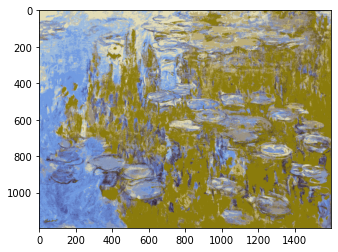

In [75]:
adaadw = cuantizacion(centroides,x)
nueva_imagen = MatrixToTensor(adaadw, data.shape[0])
plt.imshow(nueva_imagen[:,:,::-1])

Aquí se observa la pintura original.

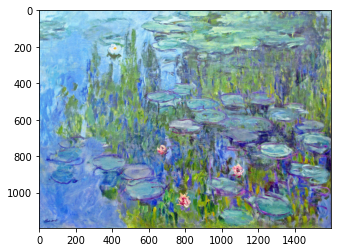

In [76]:
a = MatrixToTensor(x, data.shape[0])
plt.imshow(a[:,:,::-1])

In [77]:
cl = som.cluster(n_clusters=20)

getattr(som, 'cluster_labels')


array([13,  9,  5, 17,  3, 16,  1, 15, 18,  6, 19,  4,  0, 12, 14,  2,  8,
       11,  7, 10])

##  Pregunta 3

3. Describa brevemente que han hecho los mapas autoorganizados. Puede usar figuras, gráficas, etc para complementar esta respuesta.

Lo que hacen los mapas autoorganizados es aprendizaje no supervisado donde los datos de entrada son los vectores  de la pintura que se le de , luego lo que realiza es tomar vectores de entrada y calcular distancias con las neuronas del mapa manteniendo la neurona con menor distancia y así con todas las entradas actualizando los pesos. Lo que se vera a continuación es como el mapa partio la imágen en colores donde se puede observar que son menos de 20 tonos de colores.

C:\Users\Santiago\AppData\Local\Programs\Python\Python38\lib\site-packages\sompy-1.1.1-py3.8.egg\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


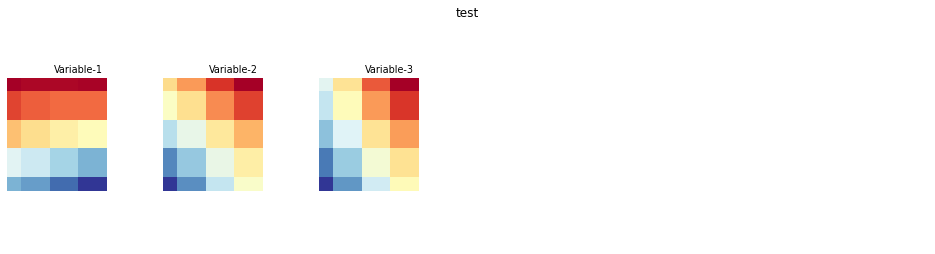

In [78]:
v = sompy.mapview.View2DPacked(5, 4, 'test',text_size=8)  

v.show(som, what='codebook', which_dim=[0,1,2], cmap=None, col_sz=6)

La siguiente función realiza todo el proceso de cuantización de color para las pinturas con 20 tonos de color.

In [85]:
def imagen_cuantizada(imagen):
    x = TensorToMatrix(imagen)
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    som = sompy.SOMFactory.build(x, [5,4])
    som.train(n_job=1, verbose='info',train_rough_len=10,train_finetune_len=10)

    centroides = som.codebook.matrix
    centroides = (centroides - np.min(centroides)) / (np.max(centroides) - np.min(centroides))

    x = (x - np.min(x)) / (np.max(x) - np.min(x))

    imagen_new = cuantizacion(centroides,x)
    nueva_imagen = MatrixToTensor(imagen_new, imagen.shape[0])
    plt.imshow(nueva_imagen[:,:,::-1])

# Pintura Dalí

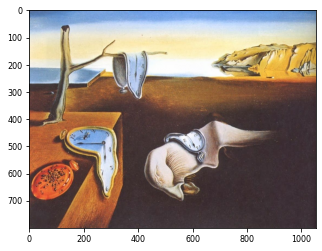

In [83]:
data = cv2.imread('Imagenes/Dali.jpg')
x = TensorToMatrix(data)
x = (x - np.min(x)) / (np.max(x) - np.min(x))
a = MatrixToTensor(x, data.shape[0])
plt.imshow(a[:,:,::-1])

 Training...
 pca_linear_initialization took: 0.611000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  1.399000, quantization error: 0.432851

 epoch: 2 ---> elapsed time:  1.481000, quantization error: 0.336023

 epoch: 3 ---> elapsed time:  1.687000, quantization error: 0.307815

 epoch: 4 ---> elapsed time:  1.375000, quantization error: 0.299210

 epoch: 5 ---> elapsed time:  1.479000, quantization error: 0.297381

 epoch: 6 ---> elapsed time:  1.471000, quantization error: 0.296169

 epoch: 7 ---> elapsed time:  1.547000, quantization error: 0.295334

 epoch: 8 ---> elapsed time:  1.616000, quantization error: 0.294602

 epoch: 9 ---> elapsed time:  1.493000, quantization error: 0.293962

 epoch: 10 ---> elapsed time:  1.500000, quantization error: 0.293373

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  1.553000, quantization error: 0.292688

 

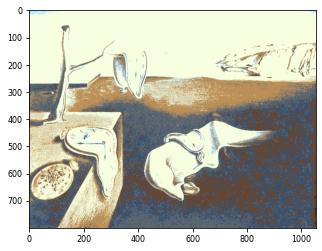

In [86]:
imagen_cuantizada(data)

# Pintura Picaso

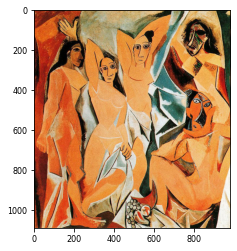

In [87]:
data = cv2.imread('Imagenes/Picaso.jpg')
x = TensorToMatrix(data)
x = (x - np.min(x)) / (np.max(x) - np.min(x))
a = MatrixToTensor(x, data.shape[0])
plt.imshow(a[:,:,::-1])

 Training...
 pca_linear_initialization took: 0.851000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  1.868000, quantization error: 0.500644

 epoch: 2 ---> elapsed time:  2.113000, quantization error: 0.420196

 epoch: 3 ---> elapsed time:  2.096000, quantization error: 0.415352

 epoch: 4 ---> elapsed time:  1.957000, quantization error: 0.414608

 epoch: 5 ---> elapsed time:  1.860000, quantization error: 0.414965

 epoch: 6 ---> elapsed time:  1.844000, quantization error: 0.415069

 epoch: 7 ---> elapsed time:  1.885000, quantization error: 0.415086

 epoch: 8 ---> elapsed time:  1.967000, quantization error: 0.415076

 epoch: 9 ---> elapsed time:  1.801000, quantization error: 0.415085

 epoch: 10 ---> elapsed time:  1.747000, quantization error: 0.415087

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  1.891000, quantization error: 0.415084

 

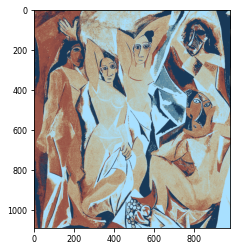

In [88]:
imagen_cuantizada(data)

# Pintura Velazquez

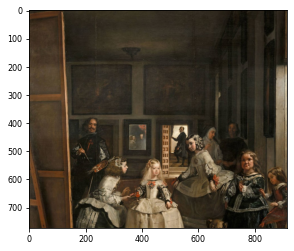

In [89]:
data = cv2.imread('Imagenes/Velazquez.jpg')
x = TensorToMatrix(data)
x = (x - np.min(x)) / (np.max(x) - np.min(x))
a = MatrixToTensor(x, data.shape[0])
plt.imshow(a[:,:,::-1])

 Training...
 pca_linear_initialization took: 0.598000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  1.304000, quantization error: 0.551327

 epoch: 2 ---> elapsed time:  1.294000, quantization error: 0.424186

 epoch: 3 ---> elapsed time:  1.312000, quantization error: 0.373253

 epoch: 4 ---> elapsed time:  1.272000, quantization error: 0.361445

 epoch: 5 ---> elapsed time:  1.236000, quantization error: 0.353267

 epoch: 6 ---> elapsed time:  1.321000, quantization error: 0.346899

 epoch: 7 ---> elapsed time:  1.529000, quantization error: 0.343942

 epoch: 8 ---> elapsed time:  1.247000, quantization error: 0.342779

 epoch: 9 ---> elapsed time:  1.361000, quantization error: 0.341814

 epoch: 10 ---> elapsed time:  1.235000, quantization error: 0.340796

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  1.321000, quantization error: 0.338948

 

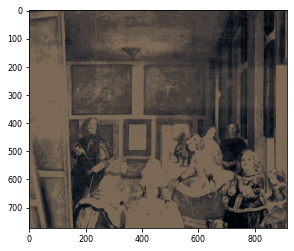

In [90]:
imagen_cuantizada(data)

# Preguntas

1. ¿Esta agusto con la cuantización realizada?

Si , por que se recrea la pintura original con los menos de 20 tonos que tiene el profesor.

2. ¿Cómo puede mejorar los resultados?

Los resultados se pueden mejorar entrenando por más epocas al mapa y poniendo más tonos de colores.

3. Describa brevemente que han hecho los mapas autoorganizados. Puede usar figuras, gráficas, etc para complementar esta respuesta.

Respondida arriba.

4. ¿Qué problemas tuvo a la hora de realizar esta parte del proyecto?

Los problemas fueron : el tiempo de ejecución del entrenamiento del mapa , entender el funcionamiento de la libreria SOMPY y entender claramente el funcionamiento de los mapas autoorganizados.